# Exploring the Prosper Loan dataset
## Objective and Overview of dataset
In this project I am exploring a dataset containing loan details that have been borrowed on the p2p lending platform 'Prosper'. The dataset contains details of about 113,000 loans such as credit scores, grades and ratings, borrower rates, APR (Annual Percentage Rate), details of last occupation status and many more. My objective with this analysis is to better understand financial services datasets and the common vocabulary used. Also to gain some intuition for data that is captured as part of the loan application and approval process. The process I am following here would be to use visualizations to gain insight.

There are 81 attributes and 113k observations in the dataset.


- Top 10 borrower states
- Loan status categories
- credit grade distribution
- Borrower rate vs Loan status
- Borrower state vs Loan status
- Employment status vs Loan status
- Loan status vs Credit Grade (heatmap)

## Top borrower states

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

prosper_df = pd.read_csv('prosperLoanData.csv')
prosper_clean_df = prosper_df

base_color = sb.color_palette()[0]

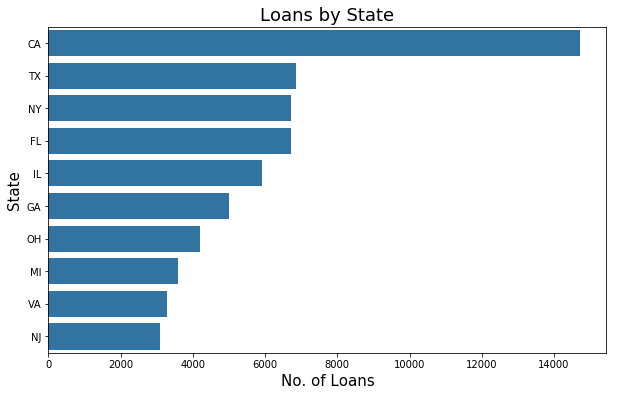

In [20]:
c = prosper_clean_df['BorrowerState'].value_counts()[:10]
fig, ax = plt.subplots(figsize=(10,6))
sb.countplot(y =prosper_clean_df['BorrowerState'],order = c.index,color = base_color)
# ax.set( xlabel = 'No. of Loans' , ylabel = 'State',title = 'Loans by State')
plt.xlabel('No. of Loans',fontsize = 15)
plt.ylabel('State', fontsize = 15)
ax.set_title('Loans by State',fontsize = 18);

## Loan status categories

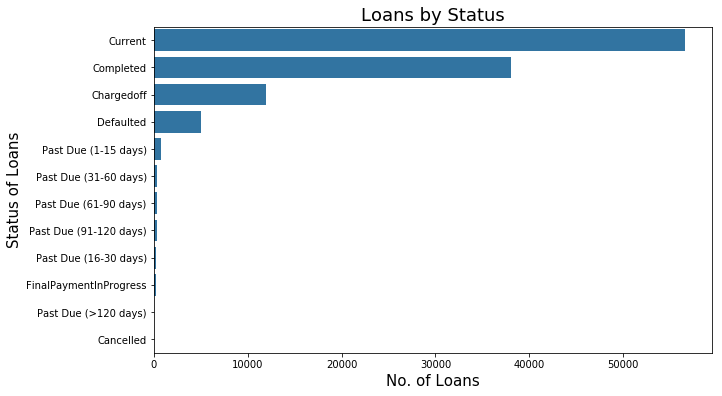

In [25]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize=(10,6))

status_ord = prosper_df.LoanStatus.value_counts().index

sb.countplot(data = prosper_df, y= 'LoanStatus',color = base_color, order = status_ord)#,order = cat_order)
#lt.xticks(rotation=45)
plt.xlabel('No. of Loans',fontsize = 15)
plt.ylabel('Status of Loans', fontsize = 15)
plt.title('Loans by Status',fontsize = 18);


- Top 10 borrower states
- Loan status categories
- credit grade distribution
- Borrower rate vs Loan status
- Borrower state vs Loan status
- Employment status vs Loan status
- Loan status vs Credit Grade (heatmap)